In [31]:
import os
import cv2
import pickle
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers

# Load the CIFAR dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize the input images
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Convert the labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

#%matplotlib inline

In [32]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [33]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers

# Create the original model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(32, 32, 3)),

    layers.Conv2D(filters=96, kernel_size=(11,11), strides=(1,1), padding='valid', kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.002)),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),

    layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same', kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.002)),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),

    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.002)),
    layers.Activation('relu'),
    layers.BatchNormalization(),

    layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.002)),
    layers.Activation('relu'),
    layers.BatchNormalization(),

    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', kernel_regularizer=regularizers.l1_l2(l1=0.002, l2=0.002)),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    layers.BatchNormalization(),

    layers.Flatten(),

    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.BatchNormalization(),

    layers.Dense(10),
    layers.Activation('softmax')
])



model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 22, 22, 96)        34944     
                                                                 
 activation_48 (Activation)  (None, 22, 22, 96)        0         
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 11, 11, 96)       0         
 g2D)                                                            
                                                                 
 batch_normalization_42 (Bat  (None, 11, 11, 96)       384       
 chNormalization)                                                
                                                                 
 conv2d_31 (Conv2D)          (None, 11, 11, 256)       614656    
                                                                 
 activation_49 (Activation)  (None, 11, 11, 256)      

In [34]:
from tensorflow.keras.callbacks import EarlyStopping
# Compile the model using each optimizer
adam_optimizer = keras.optimizers.Adam(learning_rate=0.000008)
rmsprop_optimizer = keras.optimizers.RMSprop(learning_rate=0.000008)
sgd_optimizer = keras.optimizers.SGD(learning_rate=0.000008, momentum=0.9)

optimizers = [adam_optimizer, rmsprop_optimizer, sgd_optimizer]
cb = EarlyStopping(monitor='val_accuracy', min_delta=0.05, patience=5, restore_best_weights=True)
#model_l2.compile(loss="categorical_crossentropy", optimizer=adam_optimizer, metrics=["accuracy"])

# Train the model and store the history for each optimizer
histories = []
for optimizer in optimizers:
    print(f"Training model with optimizer: {optimizer}")
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])
    history = model.fit(X_train, y_train, batch_size=128, epochs=30, validation_data=(X_test, y_test), callbacks=[cb])
    histories.append(history)

Training model with optimizer: <keras.optimizers.adam.Adam object at 0x7d302e42cc40>
Epoch 1/30
391/391 [==============================] - 25s 46ms/step - loss: 115.8663 - accuracy: 0.2510 - val_loss: 114.1189 - val_accuracy: 0.1738
Epoch 2/30
391/391 [==============================] - 17s 44ms/step - loss: 111.6507 - accuracy: 0.3535 - val_loss: 109.2040 - val_accuracy: 0.4699
Epoch 3/30
391/391 [==============================] - 18s 45ms/step - loss: 107.6085 - accuracy: 0.4070 - val_loss: 105.2611 - val_accuracy: 0.4959
Epoch 4/30
391/391 [==============================] - 17s 43ms/step - loss: 103.6444 - accuracy: 0.4402 - val_loss: 101.4053 - val_accuracy: 0.5156
Epoch 5/30
391/391 [==============================] - 17s 44ms/step - loss: 99.7668 - accuracy: 0.4709 - val_loss: 97.6227 - val_accuracy: 0.5322
Epoch 6/30
391/391 [==============================] - 17s 45ms/step - loss: 95.9881 - accuracy: 0.4959 - val_loss: 93.9504 - val_accuracy: 0.5461
Epoch 7/30
391/391 [===========

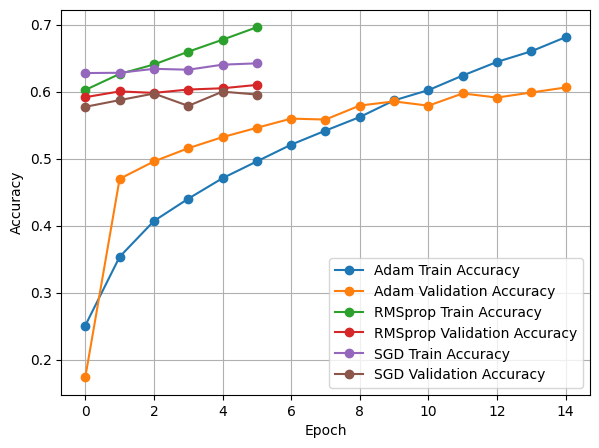

In [35]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
for i, history in enumerate(histories):
    optimizer_name = optimizers[i].__class__.__name__
    plt.plot(history.history['accuracy'], 'o-', label=f'{optimizer_name} Train Accuracy')
    plt.plot(history.history['val_accuracy'], 'o-', label=f'{optimizer_name} Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend(loc='lower right')


plt.show()

I have built a Convolutional Neural Network using Alexnet architecture for the given task of classifying the CIFAR-10 dataset. After importing the required libraries the dataset has been loaded and the training and testing data was normalized. After that the model was built using Alexnet architecture as mentioned above. Regularization was used to avoid overfitting as much as possible. I used L1 and L2 together and kept the values constant for each layer to maintain consistency. The values of L1 and L2 were varied from a range of 0.000001 to 0.001 where it was seen then 0.0005 was a suitable value for the given scenario. As we were instructed to use 3 different optimizers: Adam, RMSprop and SGD, I created different variables for each optimizer and then stored all 3 optimizers in a list. Each optimizer was given the same learning rate of 0.000008 and RMSprop was the only one with learning rate and momentum. The learning rate was kept the same so that it would be easier to compare the optimizers. Then I wrote a for loop to iterate that list for each optimizer, where the histories of each optimizer was stored in another list. The batch size was set to 128, with 30 epochs. Callback method was also used to reduce any overfitting. Finally a graph was plotted which displayed the training and validation accuracies of each optimizer with respect to epochs. It was seen that RMSprop had the highest, followed by Adam and then finally SGD. The accuracies went as high as near 70%. By training the model several times, I noticed it was getting hard to have the high accuracy with less overfitting. As a result, this model seemed to be the optimal one for me